In [12]:
# load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('./dataset/training_set', target_size=(50,50), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [7]:
# set up the cnn model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
# 卷积层
model.add(Conv2D(32, (3,3), input_shape=(50,50,3), activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# 全连接层 FC layer
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [8]:
# configure the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [13]:
# train the model
model.fit_generator(training_set, epochs=25)

C:\Users\IAdmin\AppData\Local\Temp\ipykernel_9764\1010490536.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set, epochs=25)


Epoch 1/25
250/250 [==============================] - 19s 70ms/step - loss: 0.6668 - accuracy: 0.5805
Epoch 2/25
250/250 [==============================] - 13s 53ms/step - loss: 0.5750 - accuracy: 0.6999
Epoch 3/25
250/250 [==============================] - 14s 55ms/step - loss: 0.5104 - accuracy: 0.7514
Epoch 4/25
250/250 [==============================] - 16s 64ms/step - loss: 0.4661 - accuracy: 0.7809
Epoch 5/25
250/250 [==============================] - 17s 67ms/step - loss: 0.4218 - accuracy: 0.8014
Epoch 6/25
250/250 [==============================] - 17s 67ms/step - loss: 0.3729 - accuracy: 0.8322
Epoch 7/25
250/250 [==============================] - 18s 70ms/step - loss: 0.3242 - accuracy: 0.8580
Epoch 8/25
250/250 [==============================] - 17s 67ms/step - loss: 0.2696 - accuracy: 0.8860
Epoch 9/25
250/250 [==============================] - 17s 68ms/step - loss: 0.2116 - accuracy: 0.9150
Epoch 10/25
250/250 [==============================] - 17s 67ms/step - loss: 0.163

In [16]:
# accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

C:\Users\IAdmin\AppData\Local\Temp\ipykernel_9764\736836752.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_train = model.evaluate_generator(training_set)


[0.00029201997676864266, 1.0]


In [20]:
# accuracy on the test data
test_set = train_datagen.flow_from_directory('./dataset/test_set', target_size=(50,50), batch_size=32, class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.


C:\Users\IAdmin\AppData\Local\Temp\ipykernel_9764\3326355195.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_test = model.evaluate_generator(test_set)


[1.7926690578460693, 0.7595000267028809]


In [24]:
# load the single image
# 用单个图片测试
from keras.utils import image_utils
pic_dog = 'dog1.jpg'
pic_dog = image_utils.load_img(pic_dog, target_size=(50,50))
pic_dog = image_utils.img_to_array(pic_dog)
pic_dog = pic_dog / 255
pic_dog = pic_dog.reshape(1, 50, 50, 3)
dog_result = (model.predict(pic_dog) > 0.5).astype("int64")
print(dog_result)

1/1 [==============================] - 0s 102ms/step
[[1]]


In [34]:
pic_cat = 'cat2.jpg'
pic_cat = image_utils.load_img(pic_cat, target_size=(50,50))
pic_cat = image_utils.img_to_array(pic_cat)
pic_cat = pic_cat / 255
pic_cat = pic_cat.reshape(1, 50, 50, 3)
cat_result = (model.predict(pic_cat) > 0.5).astype("int64")
print(cat_result)

1/1 [==============================] - 0s 24ms/step
[[0]]


In [35]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

1/1 [==============================] - 0s 24ms/step


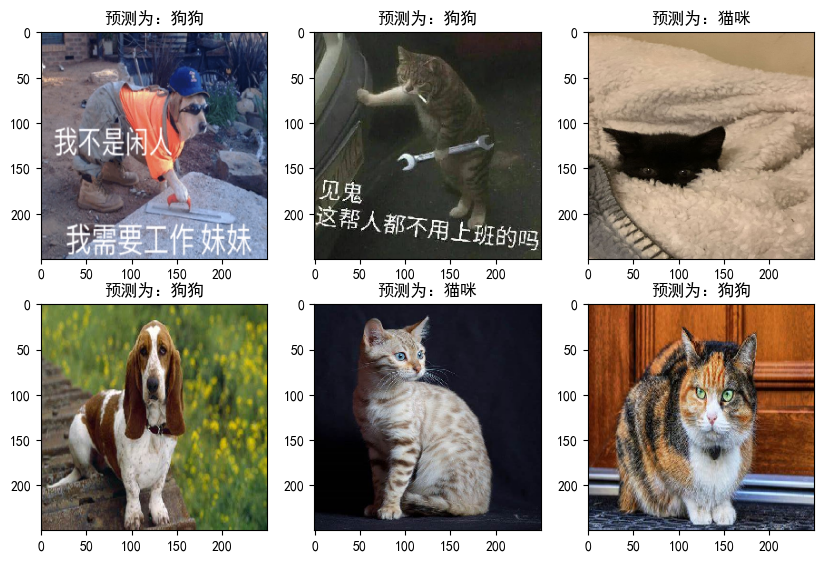

In [41]:
# make prediction on multiple images
%matplotlib inline
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.utils import image_utils
from keras.models import load_model
a = [i for i in range(1,7)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = image_utils.load_img(img_name, target_size=(50, 50))
    img = image_utils.img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = (model.predict(img) > 0.5).astype("int32")
    img_ori = image_utils.load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()